# Data
- the hdf5 file contains 100 temporal snapshots of the dataset which is of size 128^3.
- snapshots is the number of snapshots you want to load (max is 100, and I choose 50 for my compression) and the last array is the number of fields in the data. The data has 3 components of velocity and 2 scalar fields. Total = 5.
- currently lets focus on just compressing the first 3 fields i.e. the velocity, which you can see in the code snippet above.
```py
f = h5py.File('data/scalarHIT_fields100-002.h5','r')
fields = f['fields']
snapshots = 50
data = fields[:snapshots,:,:,:,:3]
```

In [121]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import imageio
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
img_direc = "/global/cscratch1/sd/roseyu/Eliza/Img"

In [118]:
data = torch.load("/global/cscratch1/sd/roseyu/3D_data/scalarHIT_fields25-0")
one_snapshot = data[0]
one_snapshot_u = one_snapshot[:,:,:,0]
one_snapshot_v = one_snapshot[:,:,:,1]
one_snapshot_w = one_snapshot[:,:,:,2]

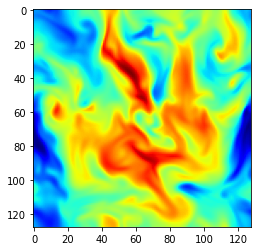

In [7]:
plt.imshow(one_snapshot_u[0], cmap='jet')
plt.show()

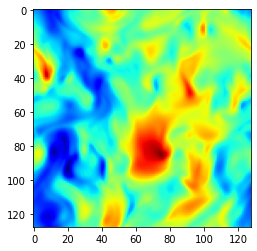

In [22]:
plt.imshow(one_snapshot_u[:,0,:], cmap='jet')
plt.show()

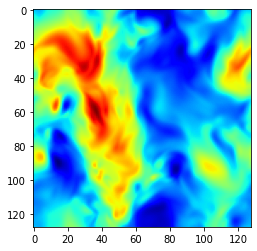

In [23]:
plt.imshow(one_snapshot_u[:,:,0], cmap='jet')
plt.show()

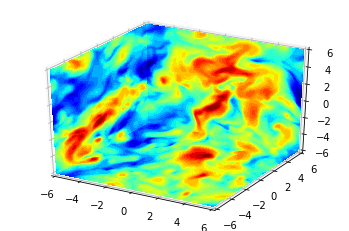

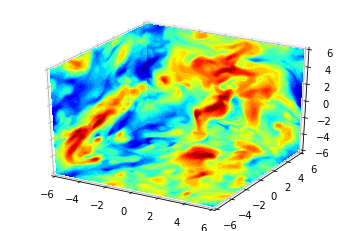

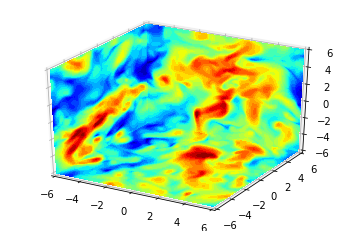

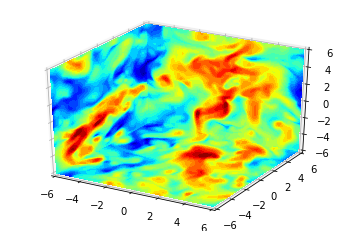

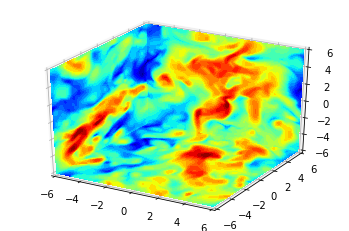

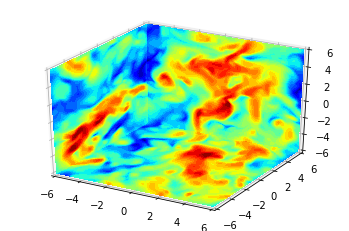

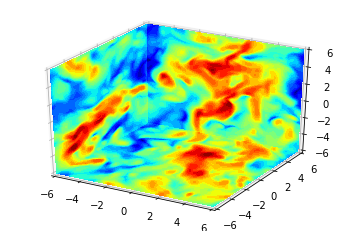

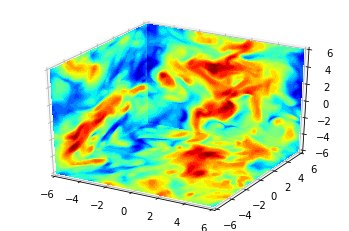

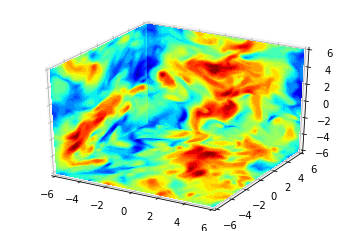

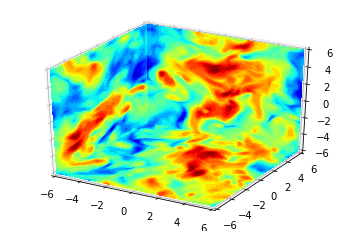

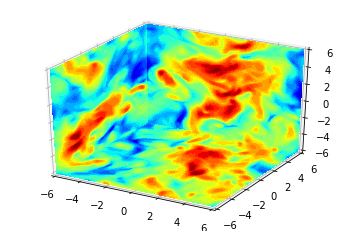

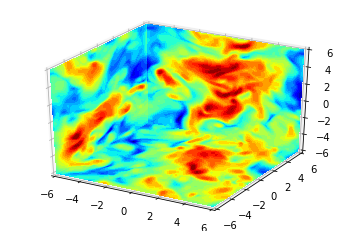

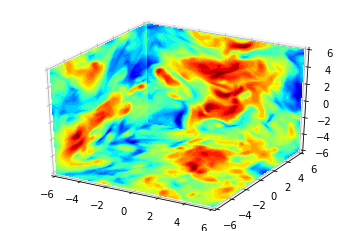

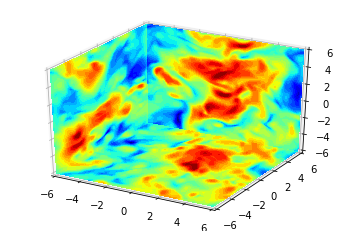

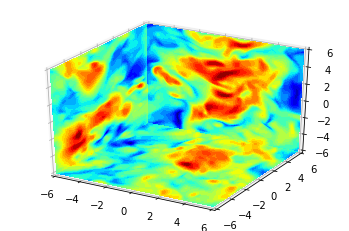

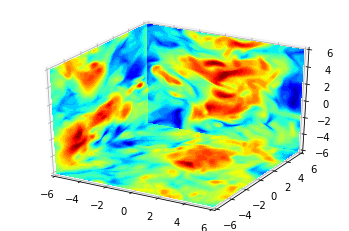

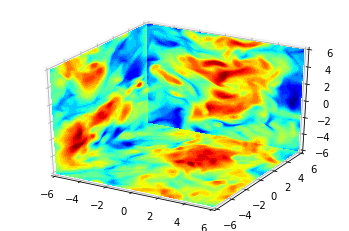

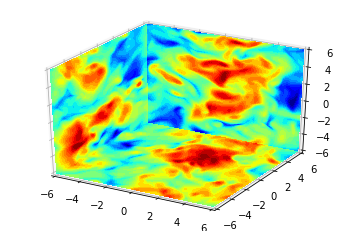

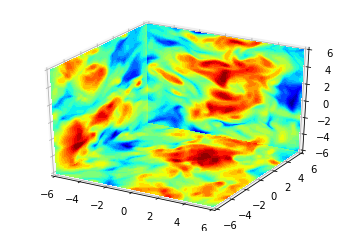

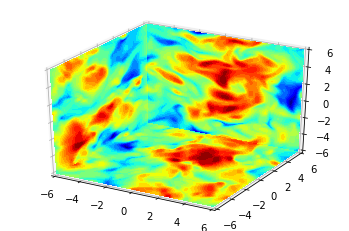

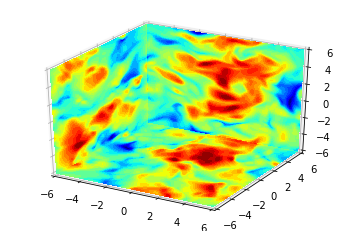

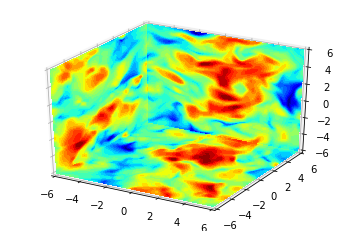

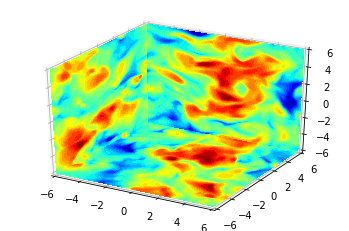

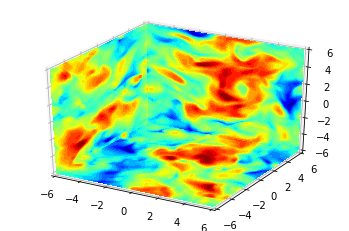

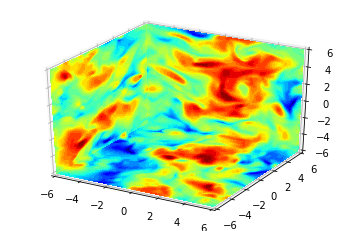

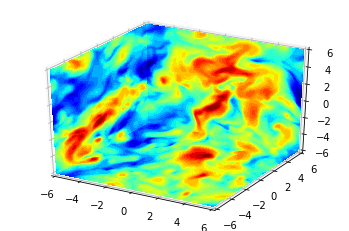

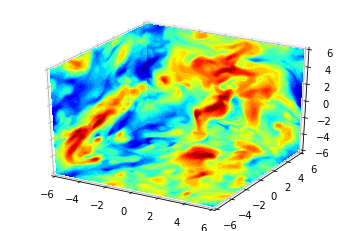

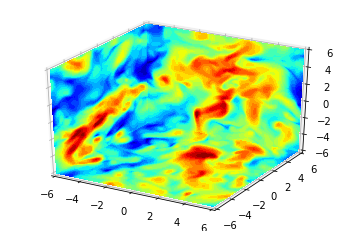

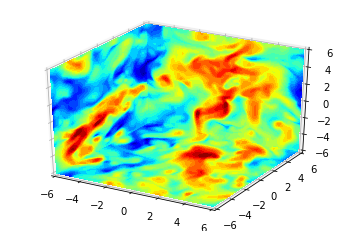

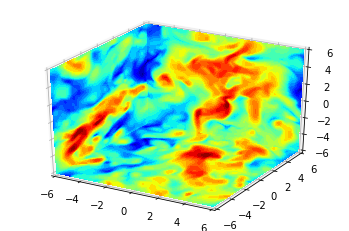

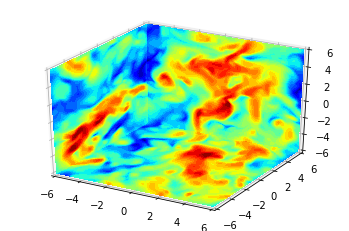

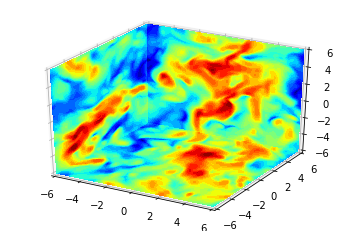

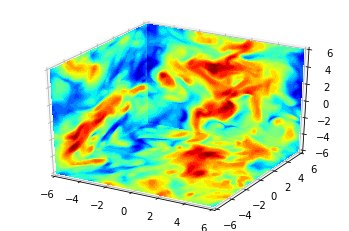

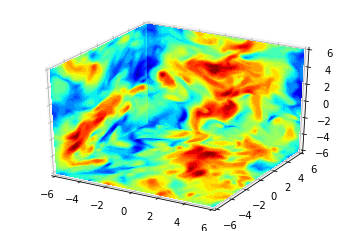

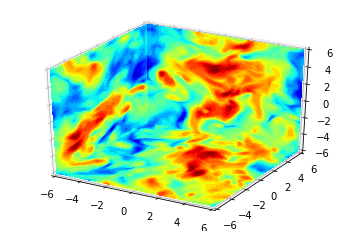

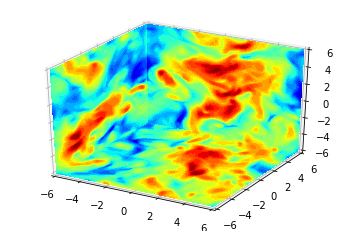

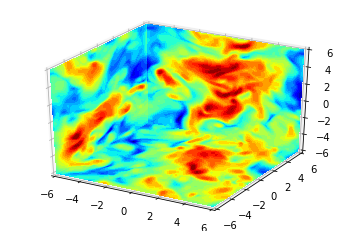

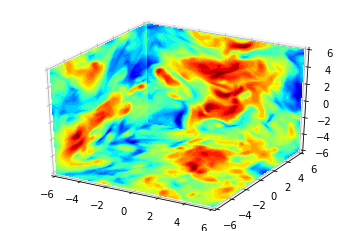

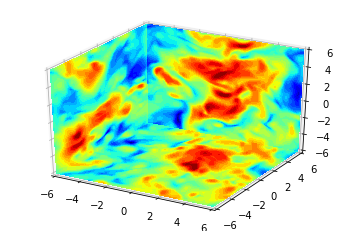

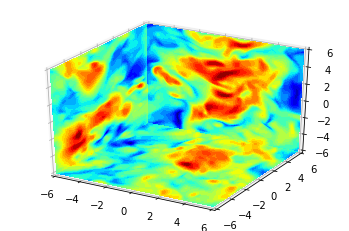

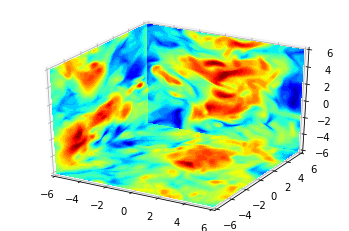

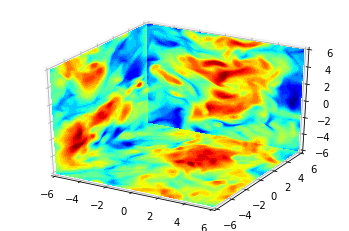

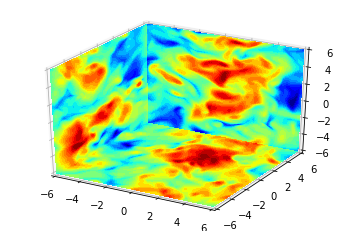

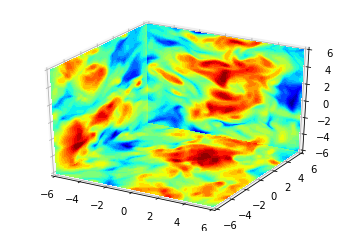

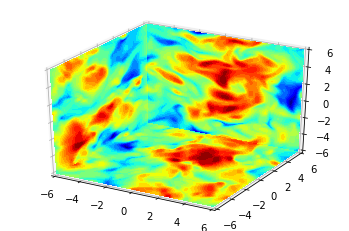

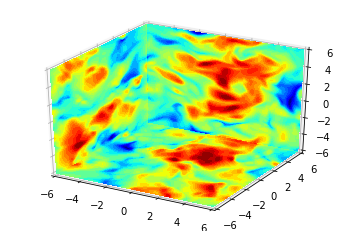

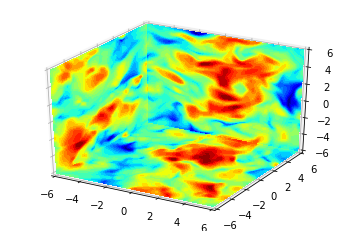

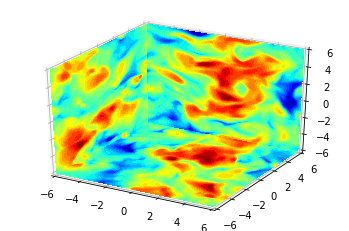

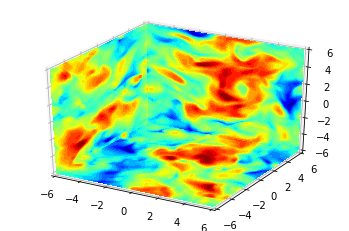

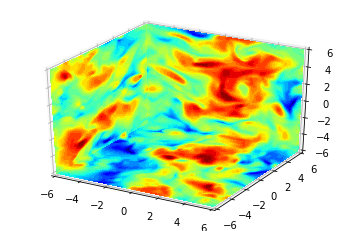

In [131]:
for i in range(2):
    data = torch.load('/global/cscratch1/sd/roseyu/3D_data/scalarHIT_fields25-' + str(i))
    
    for j in range(25):

        varone = data[j][:,:,:,0]

        plt.close('all')
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        X = np.linspace(-6, 6, 128)
        Y = np.linspace(-6, 6, 128)
        X, Y = np.meshgrid(X, Y)

        cset = [[],[],[]]

        # this is the example that worked for you:
        Z = varone[:,0,:]
        cset[0] = ax.contourf(X, Y, Z, zdir='z', offset=-6,
                              levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

        # now, for the x-constant face, assign the contour to the x-plot-variable:
        Z = varone[:,:,0]
        cset[1] = ax.contourf(Z, Y, X, zdir='x', offset=-6,
                              levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

        # likewise, for the y-constant face, assign the contour to the y-plot-variable:
        Z = varone[0,:,:]
        cset[2] = ax.contourf(X, Z, Y, zdir='y', offset=6,
                              levels=np.linspace(np.min(Z),np.max(Z),30),cmap='jet')

        # setting 3D-axis-limits:    
        ax.set_xlim3d(-6,6)
        ax.set_ylim3d(-6,6)
        ax.set_zlim3d(-6,6)

        plt.show()
        fig.savefig(img_direc + '/3d_u_' + str(i * 25 + j), bbox_inches='tight')

In [134]:
nframes = 50
files = [img_direc + '/3d_u_' + str(i) + '.png' for i in range(nframes)]
frames = [imageio.imread(f) for f in files]
imageio.mimsave(img_direc + '/3d_u.gif', frames, fps=(nframes / 5.0))
print('done!')

FileNotFoundError: No such file: '/global/cscratch1/sd/roseyu/Eliza/Img/3d_u_0.png'

In [133]:
!rm /global/cscratch1/sd/roseyu/Eliza/Img/3d_u_*